# Mathematical Transformations

1) Log transformation 
2) Reciprocal transformation
3) square/square root transformation
4) Power transformation
5) Box-Cox transformation
6) Yeo-Johnson transformation

These transformations are used to convert the distribution of data into Normal distribution. 

In that way, they try to improve the accuracy of model

=> Linear Regression, Logistic Regression, KNN, SVM with kernel=RBf and many other ML algorithms either need Normally Distributed Data or perform better on that data.

# Function Transformer
- Log transform :- It is generally applied on Right Skewed data and it centers the data. It takes log of every number. It can not be applied on negative values.
- Reciprocal transform
- Square and Square root transform :- Square transform is used for left skewed data 
- Custom transforms


# How to Know whether data is in Normal Distribution or Not ?
    Any of following can be used for this purpose: 
 - sns.displot()
 - pd.skew()  => if it gives value as 0, then it means data is normally distributed
 - QQ Plots

In [35]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [36]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [37]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [38]:
# df['Age'].fillna(df['Age'].mean(), inplace=True)
#  New approach for above 
df.fillna({'Age':df['Age'].mean()}, inplace=True)

In [39]:
df['Age'].isnull().sum()

np.int64(0)

In [40]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [41]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

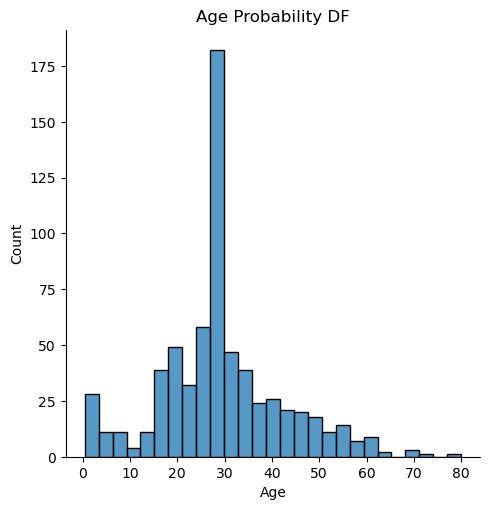

In [46]:
sns.displot(X_train['Age'])
plt.title('Age Probability DF')
plt.show()

Text(0.5, 1.0, 'Age QQ Plot')

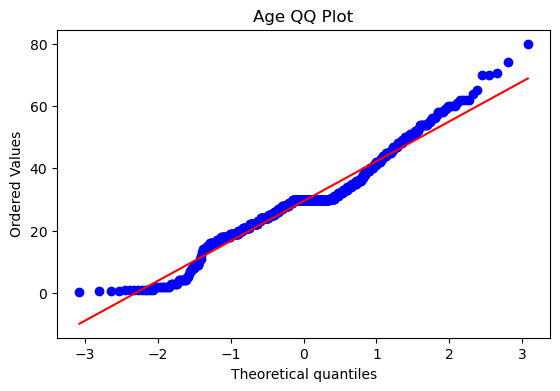

In [50]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

C:\Users\tanveer\AppData\Local\Temp\ipykernel_1704\32279186.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'],)


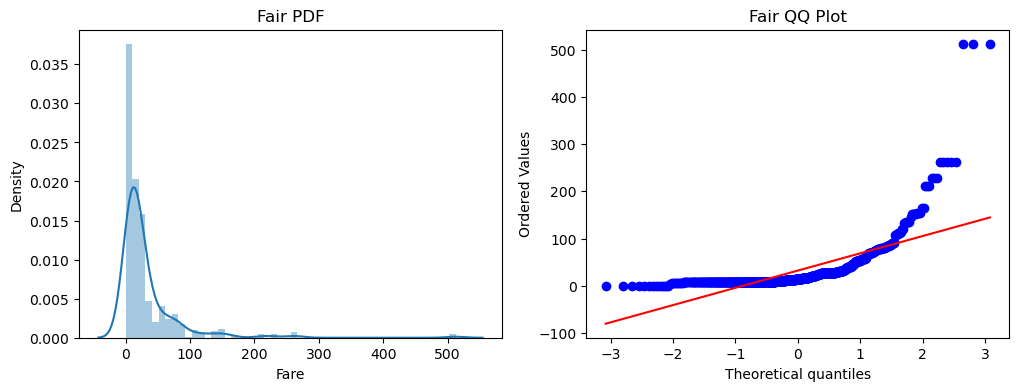

In [88]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) 
sns.distplot(X_train['Fare'],) 
plt.title('Fair PDF')

plt.subplot(1,2,2) 
stats.probplot(X_train['Fare'], dist='norm', plot=plt) 
plt.title('Fair QQ Plot')

plt.show()

In [54]:
# As we can see that Dataframe's column named "Fair" is Right Skewed, so we will apply Log transform 

# Building Model without using transformed Data

In [55]:
logistic_clf = LogisticRegression()
decision_clf = DecisionTreeClassifier() 

In [56]:
logistic_clf.fit(X_train,y_train)

LogisticRegression()

In [57]:
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
logistic_predict = logistic_clf.predict(X_test)
decision_predict = decision_clf.predict(X_test)

In [61]:
print('Accuracy score of Logistic Regression Model is: ',accuracy_score(logistic_predict, y_test))

Accuracy score of Logistic Regression Model is:  0.6636771300448431


In [62]:
print('Accuracy score of Decision Tree Classifier Model is: ', accuracy_score(decision_predict, y_test))

Accuracy score of Decision Tree Classifier Model is:  0.6860986547085202


# Building Models using transformed Data

In [89]:
trf = ColumnTransformer( 
    transformers=[ 
        ('log', FunctionTransformer(func=np.log1p), ['Fare']),
    ], 
    remainder='passthrough'
)

In [90]:
X_train_transformed = trf.fit_transform(X_train)  
X_test_transformed = trf.transform(X_test) 

In [93]:
logistic_clf1 = LogisticRegression() 
decision_clf1 = DecisionTreeClassifier()

logistic_clf1.fit(X_train_transformed, y_train)
decision_clf1.fit(X_train_transformed, y_train)

y_predict = logistic_clf1.predict(X_test_transformed)
y_predict1 = decision_clf1.predict(X_test_transformed)

In [94]:
print('Accuracy score of Logistic Regression Model is: ', accuracy_score(y_predict, y_test))
print('Accuracy score of Decision Tree Classifier Model is: ', accuracy_score(y_predict1, y_test))

Accuracy score of Logistic Regression Model is:  0.672645739910314
Accuracy score of Decision Tree Classifier Model is:  0.6995515695067265


# Building Models using transformed Data and Using Cross Validation 

In [96]:
X_transformed = trf.fit_transform(X)

logistic = LogisticRegression()
decision = DecisionTreeClassifier()

print('Logistic Model: ', np.mean(cross_val_score(logistic, X_transformed, y, scoring='accuracy', cv=10)))
print('Decision Tree Model: ', np.mean(cross_val_score(decision, X_transformed, y, scoring='accuracy', cv=10)))

Logistic Model:  0.6712609238451936
Decision Tree Model:  0.6633333333333333


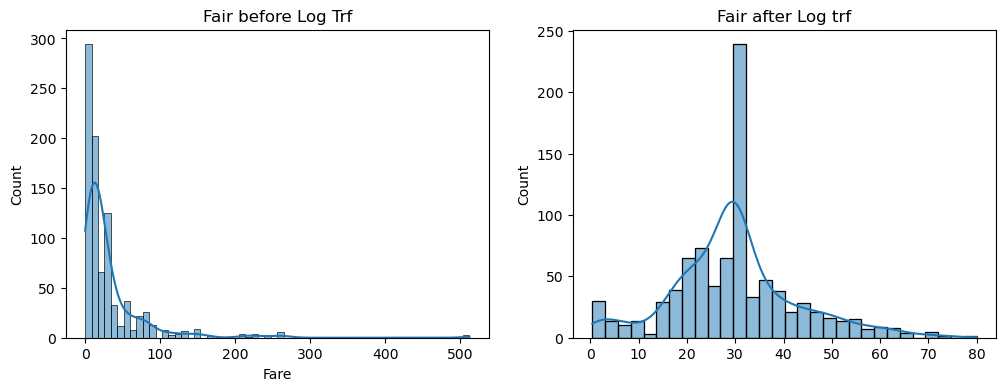

In [100]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) 
sns.histplot(X['Fare'], kde=True) 
plt.title('Fair before Log Trf')

plt.subplot(1,2,2) 
sns.histplot(X_transformed[:,1], kde=True) 
plt.title('Fair after Log trf')

plt.show()